IMPORT MODULES

In [ ]:
%pip install torch
%pip install torchaudio
%pip install transformers
%pip install librosa

   ---------------------------------------- 0.0/10.2 MB ? eta -:--:--
   - -------------------------------------- 0.3/10.2 MB 5.7 MB/s eta 0:00:02
   --- ------------------------------------ 0.8/10.2 MB 8.2 MB/s eta 0:00:02
   ----- ---------------------------------- 1.4/10.2 MB 8.7 MB/s eta 0:00:02
   ------- -------------------------------- 2.0/10.2 MB 9.9 MB/s eta 0:00:01
   ---------- ----------------------------- 2.8/10.2 MB 11.1 MB/s eta 0:00:01
   ------------ --------------------------- 3.3/10.2 MB 11.1 MB/s eta 0:00:01
   ------------- -------------------------- 3.4/10.2 MB 10.8 MB/s eta 0:00:01
   --------------- ------------------------ 3.9/10.2 MB 10.0 MB/s eta 0:00:01
   --------------- ------------------------ 4.0/10.2 MB 9.4 MB/s eta 0:00:01
   ----------------- ---------------------- 4.4/10.2 MB 9.4 MB/s eta 0:00:01
   ------------------ --------------------- 4.8/10.2 MB 8.9 MB/s eta 0:00:01
   -------------------- ------------------- 5.3/10.2 MB 9.1 MB/s eta 0:00:01
  

In [12]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio

import torchaudio
import torch
from torch.utils.data import Dataset , DataLoader
from transformers import Wav2Vec2Model , Wav2Vec2Processor, Wav2Vec2ForSequenceClassification, Trainer, TrainingArguments

import warnings
warnings.filterwarnings('ignore')

LOAD THE DATASET

In [13]:
dataset_path = "E:\Documents\Sem_6\PROJECT\Emotion Detection\TESS Toronto emotional speech set data"  
paths = []
labels = []

for dirname, _, filenames in os.walk(dataset_path):
    for filename in filenames:
        if filename.endswith(".wav"): 
            paths.append(os.path.join(dirname, filename))

            label = os.path.basename(dirname) 
            labels.append(label.lower())  
    if len(paths) == 2800:  
        break

print(f"Dataset Loaded! Found {len(paths)} audio files.")

Dataset Loaded! Found 2800 audio files.


In [14]:
len(paths)

2800

In [17]:
paths[:5]

['E:\\Documents\\Sem_6\\PROJECT\\Emotion Detection\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_back_angry.wav',
 'E:\\Documents\\Sem_6\\PROJECT\\Emotion Detection\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bar_angry.wav',
 'E:\\Documents\\Sem_6\\PROJECT\\Emotion Detection\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_base_angry.wav',
 'E:\\Documents\\Sem_6\\PROJECT\\Emotion Detection\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bath_angry.wav',
 'E:\\Documents\\Sem_6\\PROJECT\\Emotion Detection\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bean_angry.wav']

In [18]:
labels[:5]

['oaf_angry', 'oaf_angry', 'oaf_angry', 'oaf_angry', 'oaf_angry']

In [27]:
print(df['label'].unique()) 

['oaf_angry' 'oaf_disgust' 'oaf_fear' 'oaf_happy' 'oaf_neutral'
 'oaf_pleasant_surprise' 'oaf_sad']


In [19]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,E:\Documents\Sem_6\PROJECT\Emotion Detection\T...,oaf_angry
1,E:\Documents\Sem_6\PROJECT\Emotion Detection\T...,oaf_angry
2,E:\Documents\Sem_6\PROJECT\Emotion Detection\T...,oaf_angry
3,E:\Documents\Sem_6\PROJECT\Emotion Detection\T...,oaf_angry
4,E:\Documents\Sem_6\PROJECT\Emotion Detection\T...,oaf_angry


In [20]:
df['label'].value_counts()

label
oaf_angry                400
oaf_disgust              400
oaf_fear                 400
oaf_happy                400
oaf_neutral              400
oaf_pleasant_surprise    400
oaf_sad                  400
Name: count, dtype: int64

EXPOLATORY DATA ANALYSIS

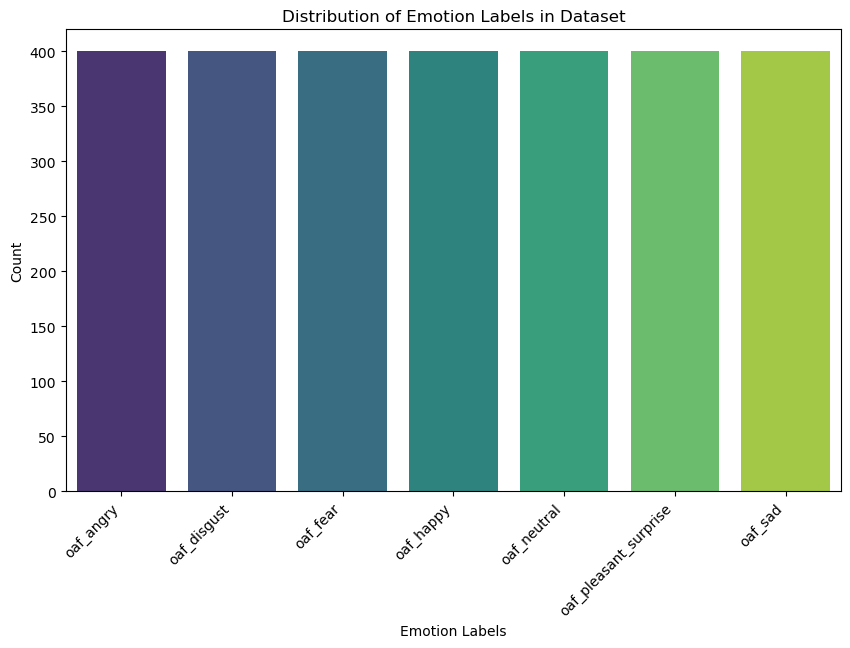

In [23]:
plt.figure(figsize=(10, 6)) 
sns.countplot(data=df, x='label', palette="viridis")  
plt.xticks(rotation=45, ha='right')
plt.xlabel("Emotion Labels")  
plt.ylabel("Count") 
plt.title("Distribution of Emotion Labels in Dataset")  
plt.show()

In [24]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

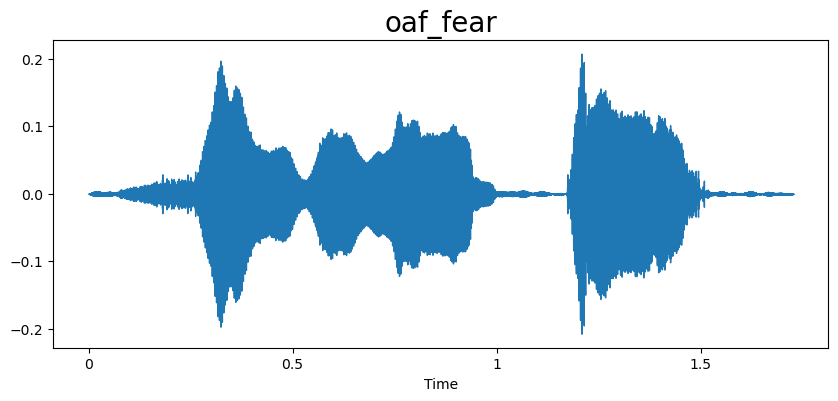

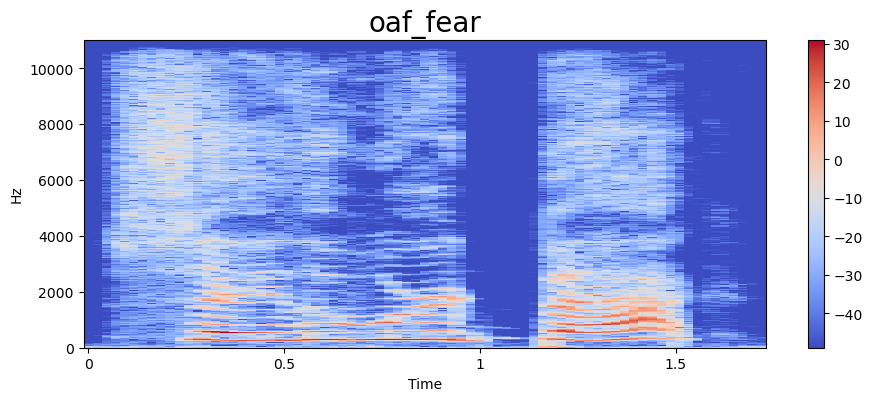

In [28]:
emotion = 'oaf_fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

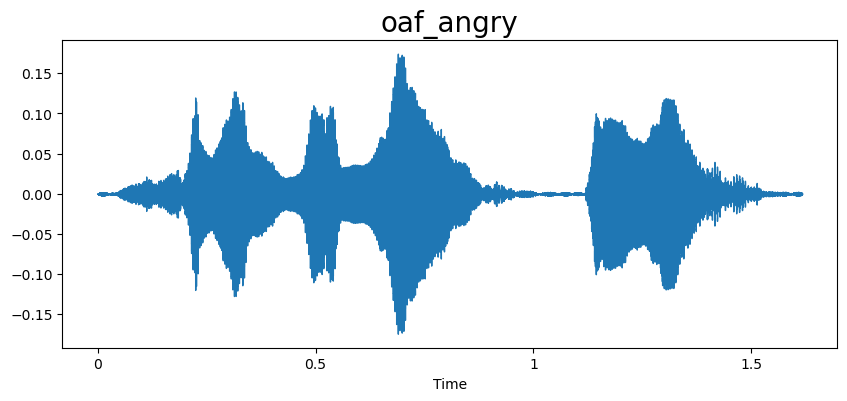

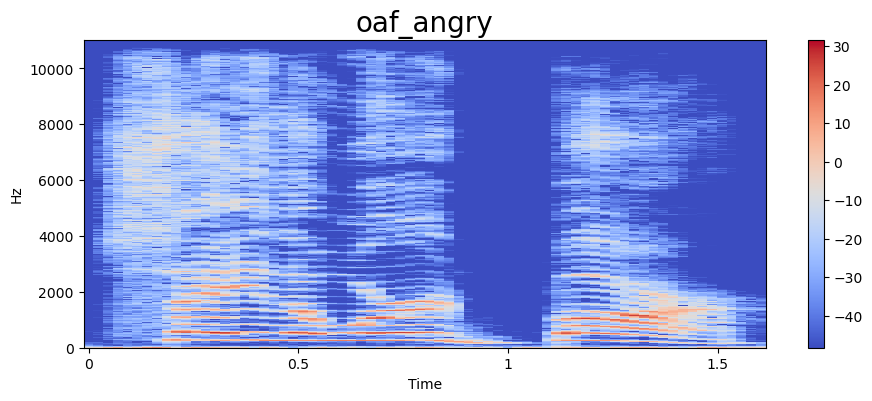

In [29]:
emotion = 'oaf_angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

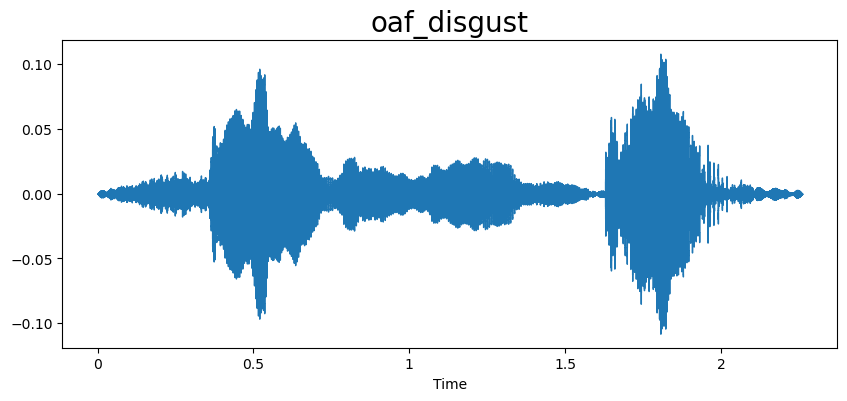

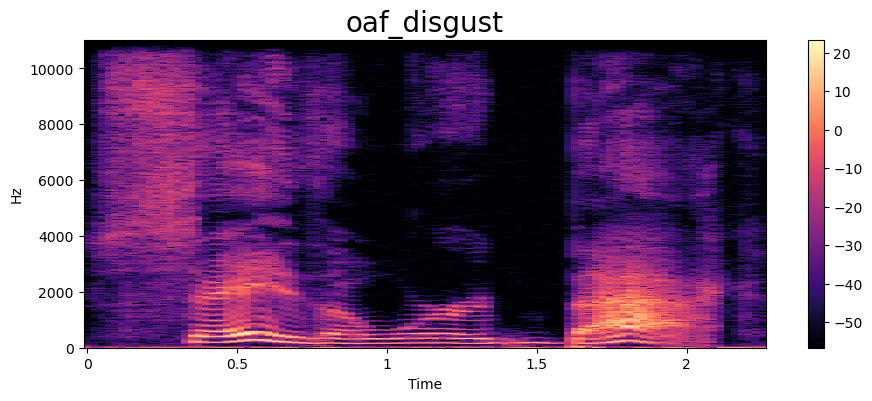

In [30]:
emotion = 'oaf_disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

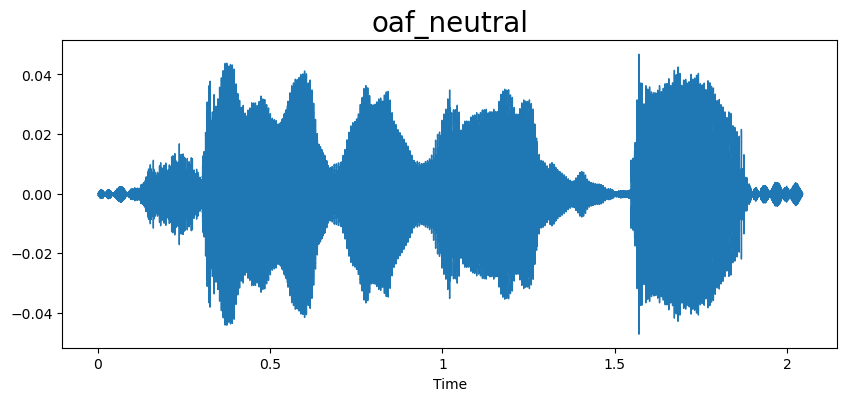

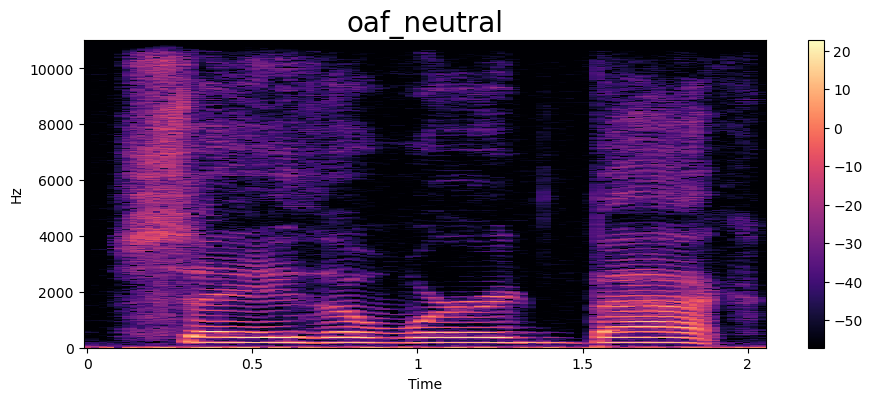

In [31]:
emotion = 'oaf_neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

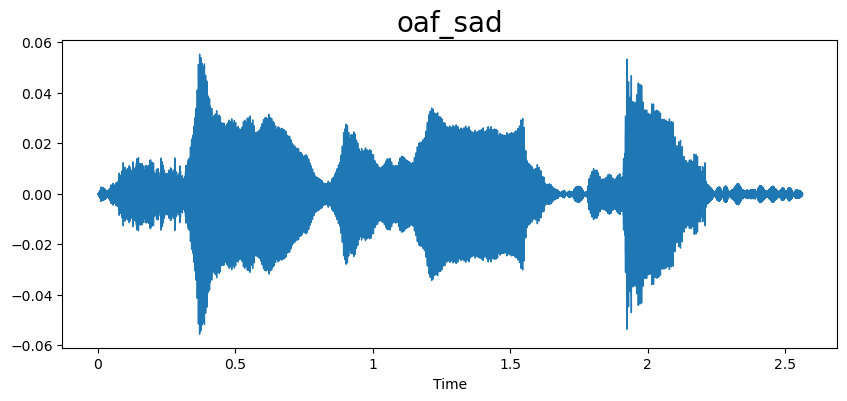

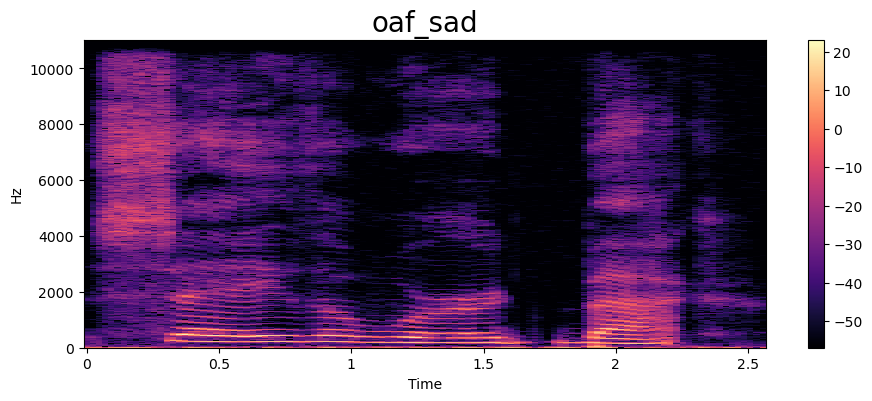

In [32]:
emotion = 'oaf_sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

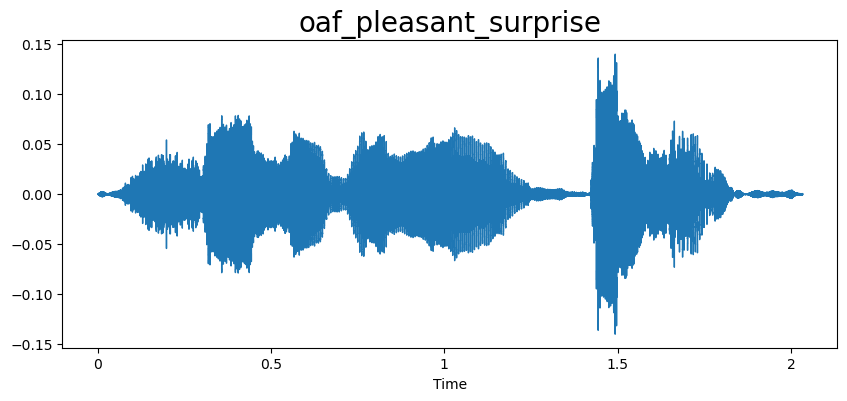

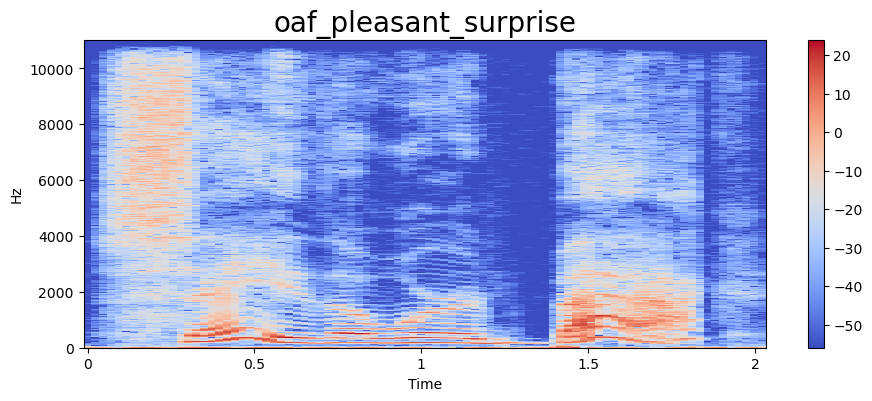

In [34]:
emotion = 'oaf_pleasant_surprise'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

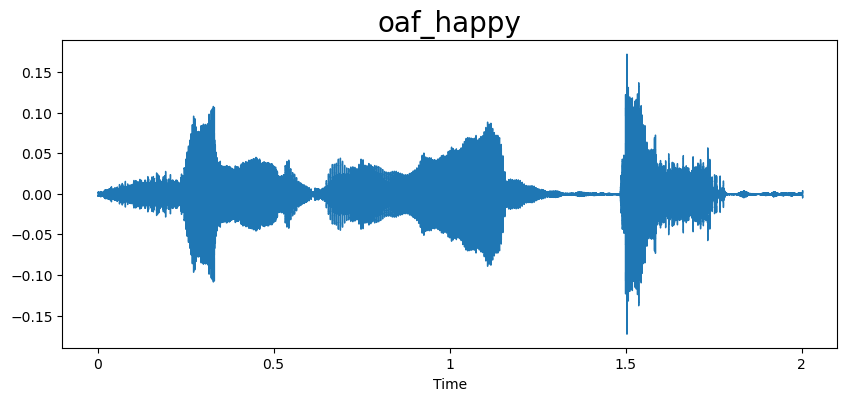

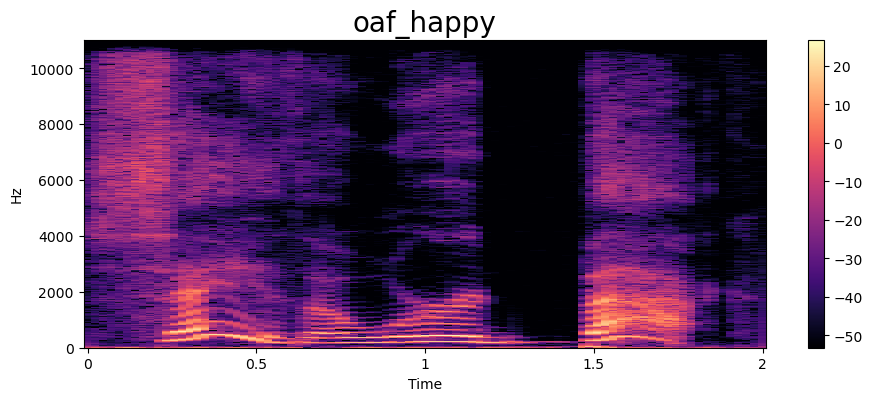

In [35]:
emotion = 'oaf_happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

FEATURE EXTRACTION 